In [130]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

(torch.Size([100, 1]), torch.Size([100, 1]))

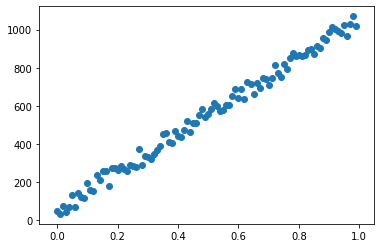

In [146]:
x = torch.arange(100, dtype=torch.float32)
y = (x * 10 + 5) + torch.rand(100) * 1e2
x = x.unsqueeze(-1)
y = y.unsqueeze(-1)
x = x/100
plt.scatter(x,y)

x.shape, y.shape

In [1]:
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)
loss_fn = nn.MSELoss(reduction='sum')
for p in model.parameters():
    nn.init.uniform_(p)

model

NameError: name 'nn' is not defined

0 8563749.0
100 8563749.0
200 8563749.0
300 8563749.0
400 8563749.0
500 8563749.0
600 8563749.0
700 8563749.0
800 8563749.0
900 8563749.0


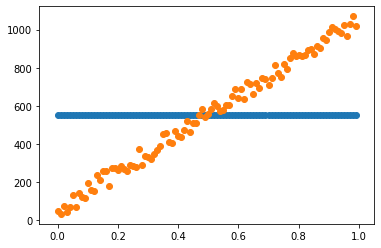

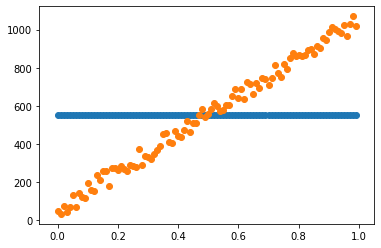

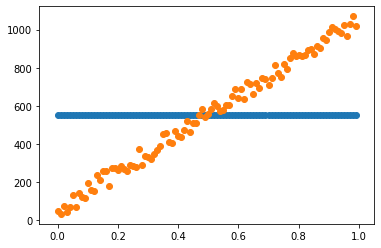

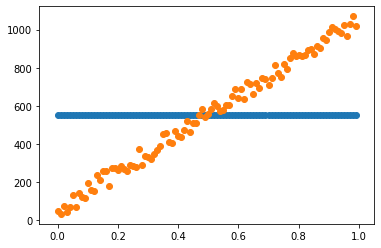

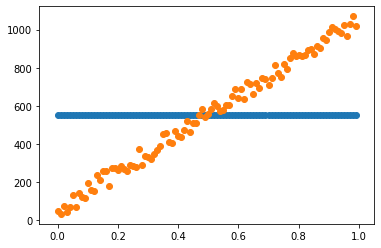

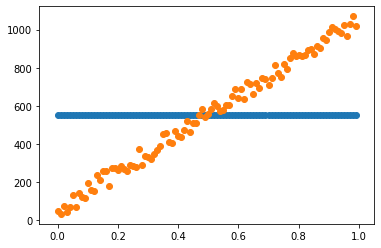

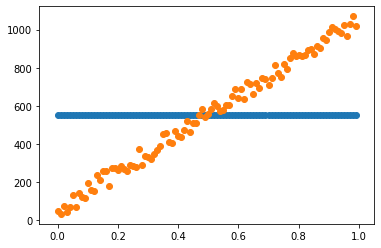

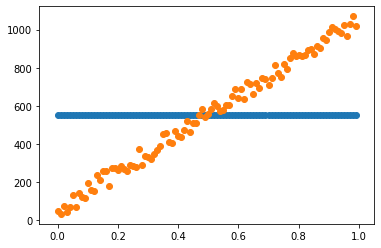

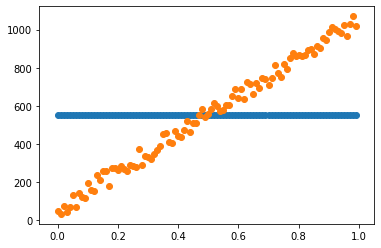

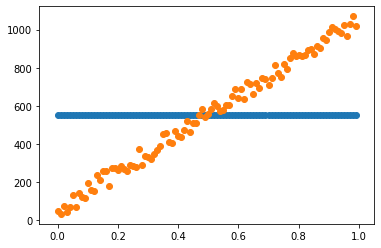

In [196]:
epochs = 1000
lr = 1e-7
optimizer = optim.SGD(model.parameters(), lr=lr)

for i in range(epochs):
    y_hat = model(x)
    loss = loss_fn(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# optimizer.step() does something like this
#     with torch.no_grad():
#         for param in model.parameters():
#             param -= lr * param.grad          
    
    if i % 100 == 0:
        print(i, loss.item())
        plt.figure()
        plt.scatter(x, y_hat.detach().numpy())
        plt.scatter(x, y)